Hello Enrique!

I’m happy to review your project today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>

# Model Creation for Beta Bank Customer Data

# Introduction

Beta bank customers are slowly dwindling more and more over time. The bank has decided to just try to keep existing customers instead of attract new ones. We will need to create a model to predict when a client will leave. We must investigate and pre-process our data to have it ready for our model testing. We will also need to take into account imbalances in our data and check our model to avoid additional errors or biases.

__Our F1 score needs to be at least 0.59__ 

In [1]:
#Import our libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

In [2]:
#Unpack our data

bank_data = pd.read_csv('/datasets/Churn.csv')
print(bank_data.info())
bank_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Let's begin with the surname and row number column; they have no logical value to us in predicting if a customer will churn. There's no need to confuse our model trying to take these columns into account, so we will drop them.

In [3]:
bank_data = bank_data.drop(['Surname', 'RowNumber'], axis =1) #dropping the surname column
bank_data.head(3)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1


Equally, the customer ID serves no purpose to us as we cannot take any calculations from this column.

In [4]:
bank_data = bank_data.drop('CustomerId', axis =1)
bank_data.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1


The tenure column is missing values, so let's examine this.

In [5]:
bank_data['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

The missing values represent about a tenth of the total data. We may conclude that these customers decided to not have a fixed deposit tenure. It would be better to not drop these values since they still represent an important class in our data. However, it can interfere with model creation, so let's use the median value as a placeholder.

In [6]:
bank_data['Tenure'] = bank_data['Tenure'].fillna(bank_data['Tenure'].median())
bank_data['Tenure'].value_counts()

5.0     1836
1.0      952
2.0      950
8.0      933
3.0      928
7.0      925
4.0      885
9.0      882
6.0      881
10.0     446
0.0      382
Name: Tenure, dtype: int64

Our last issue is that the geography and gender columns are categorical. While these metrics are definitely important in our analysis, we will need to quantify them for our model first.

In [7]:
#first let's see the split of female and male customers at the bank

bank_data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

It is fairly even, so our model should not have a bias here.

In [8]:
#let's also check the split of geographical values 

bank_data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

France definitely has the lead here, but not an overwhelming one. For now, we will not take this imbalance into account.

In [9]:
#turning gender and geography columns into numeric columns

bank_data = pd.get_dummies(bank_data, columns=['Geography', 'Gender'], drop_first=True)
bank_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


We have now quanitified gender and geography. Although we don't have a "gender female" or "geography France" column, it can be inferred by the results of the other columns.

In [10]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Everything is correct. Well done!

</div>

We are now working with all numeric columns. Let's look at the balance for the rest of the classes in our features. (v2)

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Before to work with ML models you should 'Examine the balance of classes.'. For instance, you can use method .value_counts() to do it.

</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>
 
Your target is 'Exited'. And so you need to 'Examine the balance of classes' in this column.
    
</div>

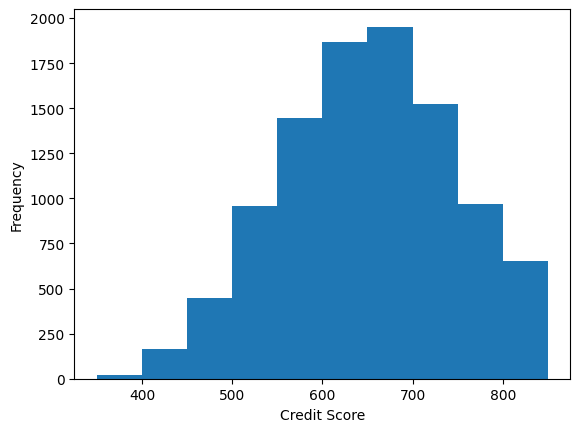

In [11]:
bank_data['CreditScore'].plot(kind='hist')
plt.xlabel('Credit Score')
plt.show()

The distribution is quite normal for credit score, but customers with good credit (650+) making up a majority. 

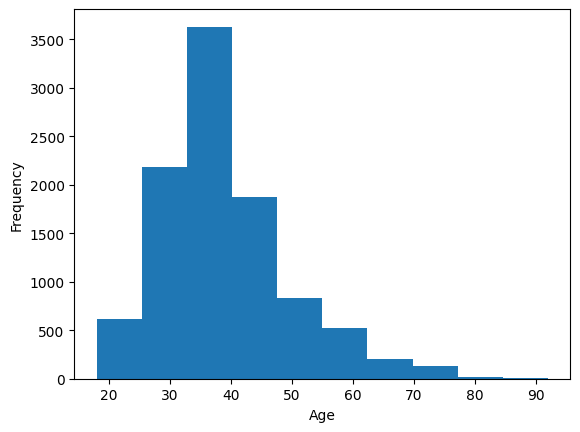

In [12]:
bank_data['Age'].plot(kind='hist')
plt.xlabel('Age')
plt.show()

There definitely is an imbalance towards younger people in this bank with customers under 40 making up a large majority.

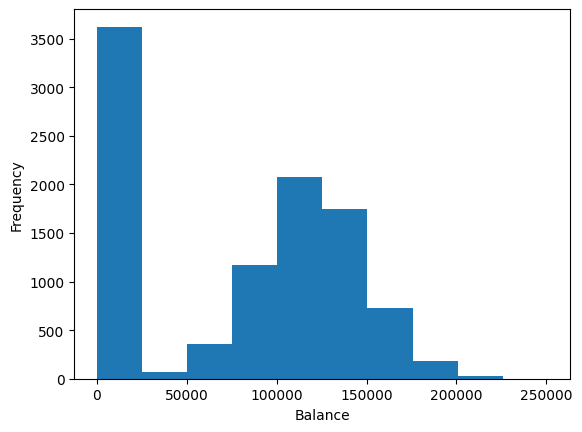

In [13]:
bank_data['Balance'].plot(kind='hist')
plt.xlabel('Balance')
plt.show()

This one has a much different distribution, with many customers having no balance, or within the 100,000 to 150,000 range. 

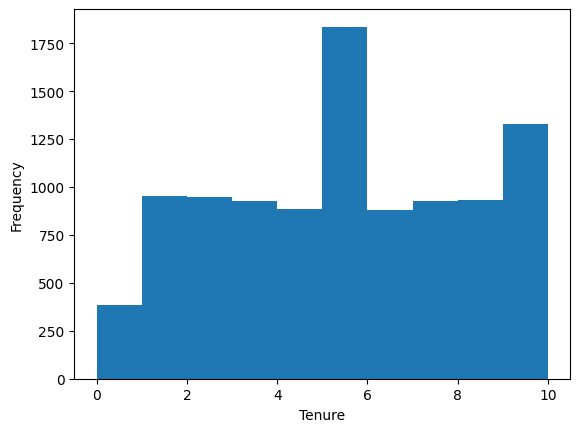

In [14]:
bank_data['Tenure'].plot(kind='hist')
plt.xlabel('Tenure')
plt.show()

Tenure is actually quite even across the board except at the value for 5 years where we replaced missing values for the median value.

In [15]:
bank_data['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

Not many values here, but a large imbalance for less products. 

In [16]:
bank_data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

Definitely an imbalance here for customers HAVING a credit card with the bank.

In [17]:
bank_data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

This class is actually quite balanced. 

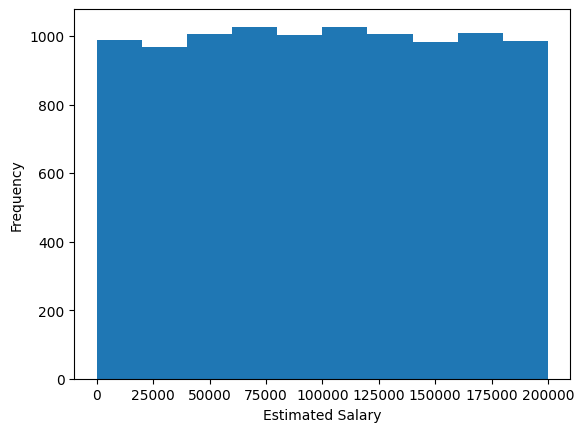

In [18]:
bank_data['EstimatedSalary'].plot(kind='hist')
plt.xlabel('Estimated Salary')
plt.show()

Esimated salary is also another class that is pretty balanced. 

## Preparing the Models

In [19]:
#establish our features and target

features = bank_data.drop('Exited', axis=1)
target = bank_data['Exited']

#create a 60/20/20 split for training, validation, and test set respectively

#first create our training set and a temporary set of 40%
feature_train, feature_temp, target_train, target_temp = train_test_split(features, target, test_size = 0.4, random_state=12345)

#now let's split the temporary set into our validation and test sets of 20% each (40 * 0.5)
feature_valid, feature_test, target_valid, target_test = train_test_split(feature_temp, target_temp, test_size = 0.5, random_state = 12345)

Let's test a random forest model.

In [20]:
#model creation and testing with validation set

model_rf = RandomForestClassifier(random_state = 12345)
model_rf.fit(feature_train, target_train) #Train our model
predictions_valid = model_rf.predict(feature_valid)
f1_score_rf = f1_score(target_valid, predictions_valid)

print(f"F1 Score of our Random Forest model: {f1_score_rf}")

F1 Score of our Random Forest model: 0.5748502994011976


Solid start, however overfitting could be an issue, as well as our F1 score not meeting our minimum. But we do have a place to begin now.

Let's test a decision tree model.

In [21]:
#model creation and testing with validation set

model_dt = DecisionTreeClassifier(random_state = 12345)
model_dt.fit(feature_train, target_train)
predictions_valid = model_dt.predict(feature_valid)
f1_score_dt = f1_score(target_valid, predictions_valid)

print(f"F1 Score of our Decision Tree model: {f1_score_dt}")

F1 Score of our Decision Tree model: 0.5036319612590799


This model is a little worse across the board, but still solid considering our lack of optimizations so far.

## Optimization and Class Balancing

In [22]:
bank_data.head(3) #recalling our data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0


It would make the most sense to scale our age, credit score, tenure, number of products, salary, and balance columns. We want our algorithm to take all of these columns equally into account.

In [23]:
#put our numeric columns into a list

numeric = ['CreditScore', 'Age', 'NumOfProducts','Tenure', 'Balance', 'EstimatedSalary']

scaler = StandardScaler() #scale our numeric columns
scaler.fit(feature_train[numeric])
feature_train[numeric] = scaler.transform(feature_train[numeric])
feature_valid[numeric] = scaler.transform(feature_valid[numeric])
feature_test[numeric] = scaler.transform(feature_test[numeric]) #v2

feature_train.head()

/tmp/ipykernel_255/1884085129.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_train[numeric] = scaler.transform(feature_train[numeric])
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_255/1884085129.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,1.082277,1.232271,-0.891560,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.082277,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.737696,1.027098,0.830152,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.354288,-1.233163,0.830152,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-1.101690,1.140475,-0.891560,0,0,1.524268,1,0,0


~~Let's create a new random forest model with our scaled data.~~

~~#model creation and testing with validation set on scaled data
model_rf_scaled = RandomForestClassifier(random_state = 12345)
model_rf_scaled.fit(feature_train, target_train) #Train our model
predictions = model_rf_scaled.predict(feature_valid)
f1_score_rf_scaled = f1_score(target_valid, predictions)
print(f"F1 Score of our Random Forest model: {f1_score_rf_scaled}")~~

~~Our F1 score has increased by a tad, but nothing to write home about.~~

<div class="alert alert-block alert-info">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Scaling can affect only on linear models. It can't affect on tree-based models. Just keep it in mind:)

</div>

~~Now we will try the same thing with our decision tree model.~~

~~#model creation and testing with validation set on scaled data
model_dt_scaled = DecisionTreeClassifier(random_state = 12345)
model_dt_scaled.fit(feature_train, target_train)
predictions_valid = model_dt_scaled.predict(feature_valid)
f1_score_dt_scaled = f1_score(target_valid, predictions_valid)
print(f"F1 Score of our Decision Tree model: {f1_score_dt_scaled}")~~

Let's try a new model: Logistic Regression.

In [24]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear', class_weight = 'balanced') #apply class weight balance
model_lr = model_lr.fit(feature_train, target_train)
predictions = model_lr.predict(feature_valid)
f1_score_lr = f1_score(target_valid, predictions)
probabilities_valid = model_lr.predict_proba(feature_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(f"F1 Score of our Logistic Regression model: {f1_score_lr}")
print(f"AUC-ROC score of our Logistic Regression model: {auc_roc}")

F1 Score of our Logistic Regression model: 0.4888507718696398
AUC-ROC score of our Logistic Regression model: 0.7637310291013133


Let's tune a random forest model for comparison. We will be balancing the class weights in the class weight argument. (v2)

In [25]:
best_f1_score = 0
best_est = 0
for est in range(1, 25): 
    model = RandomForestClassifier(random_state=12345, max_depth = 7, n_estimators=est, class_weight='balanced') #balance classes
    model.fit(feature_train, target_train)
    predictions = model.predict(feature_valid)
    score = f1_score(target_valid, predictions)
    if score > best_f1_score:
        best_f1_score = score
        best_est = est
probabilities_valid = model.predict_proba(feature_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)  

print("F1 score of the best model on the validation set: (n_estimators = {}): {}".format(best_est, best_f1_score))
print(f"AUC-ROC score of the best Random Forest model: {auc_roc}")

F1 score of the best model on the validation set: (n_estimators = 7): 0.6288770053475936
AUC-ROC score of the best Random Forest model: 0.8508799654002263


We have a good model here that meets our F1 score minimum and has a solid AUC-ROC score as well. (v2)

In [26]:
model = RandomForestClassifier(random_state=12345, max_depth = 7, n_estimators=7, class_weight='balanced')
model.fit(feature_train, target_train)
predictions = model.predict(feature_test)
score = f1_score(target_test, predictions)
probabilities_test = model.predict_proba(feature_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)

print(f"F1 score of the best model on the test set: {score}")
print(f"AUC-ROC score of our best Random Forest model on the test set: {auc_roc}")

F1 score of the best model on the test set: 0.602308499475341
AUC-ROC score of our best Random Forest model on the test set: 0.8450974483975469


__Our best random forest model has met our minimum threshold for F1 score on the test set!__ (v2)

We could stop here but let's see how downsampling affects our model. (v2)

In [27]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones])

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(feature_train, target_train, 0.75)

In [28]:
#find the best random forest model with our downsampled data

best_f1_score = 0
best_est = 0
for est in range(1, 50): # choose hyperparameter range
    model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=7, class_weight = 'balanced')
    model.fit(features_downsampled, target_downsampled)
    predictions = model.predict(feature_valid)
    score = f1_score(target_valid, predictions)
    if score > best_f1_score:
        best_f1_score = score
        best_est = est

print("F1 score of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_f1_score))

F1 score of the best model on the validation set (n_estimators = 37): 0.6276150627615062


In [29]:
model = RandomForestClassifier(random_state=12345, max_depth = 7, n_estimators=37, class_weight='balanced')
model.fit(features_downsampled, target_downsampled)
predictions = model.predict(feature_test)
score = f1_score(target_test, predictions)
probabilities_test = model.predict_proba(feature_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)

print(f"F1 Score of our Random Forest model: {score}")
print(f"AUC-ROC score of our best Random Forest model on the test set: {auc_roc}")

F1 Score of our Random Forest model: 0.6006191950464397
AUC-ROC score of our best Random Forest model on the test set: 0.8507340298109198


The F1 has dropped slightly, but still above the threshold. The AUC-ROC score has improved. Let's use the model with the improved AUC-ROC.

~~Our models may be suffering from overfitting, we can check our hyperparameters.~~

~~#creating a random tree model and lowering our estimator range and keeping a fixed low max depth 
#we will also be balancing the class weight
best_f1_score = 0
best_est = 0
for est in range(1, 10):
    model = RandomForestClassifier(random_state=12345,max_depth =5, n_estimators=est, class_weight='balanced') #keep max_depth low
    model.fit(feature_train, target_train)
    predictions = model.predict(feature_valid)
    score = f1_score(target_valid, predictions)
    if score > best_f1_score:
        best_f1_score = score
        best_est = est
print("F1 score of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_f1_score))~~

~~model = RandomForestClassifier(random_state=12345,max_depth =5, n_estimators=9, class_weight='balanced') #using best model
model.fit(feature_train, target_train)
predictions = model.predict(feature_test)
score = f1_score(target_test, predictions)
print(f"F1 Score of our Random Forest model: {score}")~~

~~Unfortunately we suffer the same fate as our model does not pass the test set. The random forest model may not be serving our purpose, let us retry with a logistic regression model using the downsampled data.~~

~~#experiment with the fraction argument
features_downsampled, target_downsampled = downsample(feature_train, target_train, 0.3)
model_lr = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced') #apply class weight balance
model_lr = model_lr.fit(features_downsampled, target_downsampled)
predictions = model_lr.predict(feature_valid)
f1_score_lr = f1_score(target_valid, predictions)
print(f"F1 Score of our Logistic Regression model: {f1_score_lr}")~~

~~Small improvement, but still much left to be desired. Let's experiment with threshold adjustment and find the threshold with the highest F1 score.~~

~~model = LogisticRegression(random_state=12345 ,class_weight='balanced')
model.fit(features_downsampled, target_downsampled)
probabilities_valid = model.predict_proba(feature_valid)
probabilities_one_valid = probabilities_valid[:, 1]
for threshold in np.arange(0.25, 0.8, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    f1_score_lr = f1_score(target_valid, predicted_valid)
    print('Threshold = {:.2f} | F1 Score = {:.2f}'.format(threshold, f1_score_lr))~~

~~Shoot and a miss, our threshold adjustment only slightly moves the needle for us.~~

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

You forgot to scale test data. That's why the model quality on the test data is low for each model:)

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Well done!

</div>

v2: Fixed and updated :)

~~## Revisiting the Data and Rebalancing~~

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

After you fix the problem in the section 2 it's better to remove the section 3 because it will be a duplicate code.

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Thank you:)

</div>

v2: Fixed and section no longer needed.

## Measure ROC Curve

Let's see how our model compares to a random model by plotting a ROC curve. (v2)

In [30]:
best_model = model
probabilities_test = best_model.predict_proba(feature_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(auc_roc)

0.8507340298109198


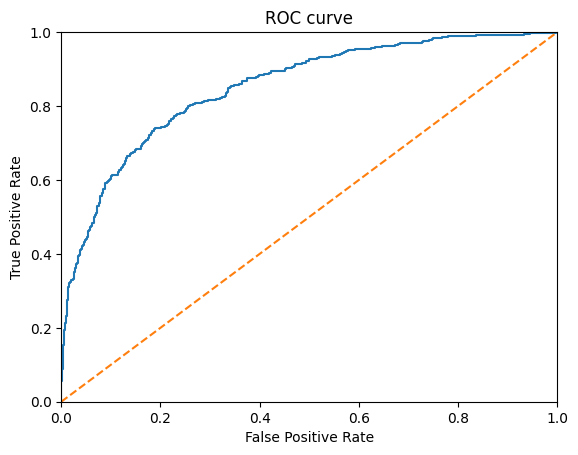

In [31]:
# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()

We have now created a high quality model. The high curve represents a better TPR (true positive rate) that performs much better than a random model. 

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

1. It's a bit weird to calculate f1 score on test data but roc-auc score on validation data for the best model:)
2. Could you, please calculate roc-auc score each time you calculate f1 score? You have 2 metrics in this project and so you need to calculate them both each time. 

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Everything is correct. Good job!

</div>

v2: Fixed, AUC-ROC is used on test set and now presents better results :)

# Conclusion

We have tested several models, first not taking class balance into account, and then fine-tuning and fixing our class imbalance. It was certainly a tedious process, but we tested several models that were tested with unedited data, downsampled data, and scaled data. Scaling our data and downsampling proved to be quite helpful. Our final model was a random forest model using downsampled which met the minimum threshold for our F1 score of 0.59 on validation and test sets. The ROC curve also demonstrated that this model is significantly better than a random guessing model. 